# About the Dataset
The NIH Chest X-ray Dataset consists of 112,120 X-ray images with disease labels from 30,805 unique patients. The labels were created using Natural Language Processing to extract disease classifications from the related radiological reports. These labels are estimated to be over 90% accurate.

## Class Details
There are 15 classes, which include 14 diseases and one for "No findings". Each image can be classified as "No findings" or one or more disease classes:

- Atelectasis
- Consolidation
- Infiltration
- Pneumothorax
- Edema
- Emphysema
- Fibrosis
- Effusion
- Pneumonia
- Pleural thickening
- Cardiong
- Cardiomegaly
- Nodule Mass
- Hernia

Reading and diagnosing chest x-ray images may be a relatively simple task for radiologists but, in fact, it is a complex reasoning problem which often requires careful observation and knowledge of anatomical principles, physiology and pathology. Such factors increase the difficulty of developing a consistent and automated technique for reading chest X-ray images while simultaneously considering all common thoracic diseases. This Tasks is prefect for NN.

- [Reseach paper](http://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf)
- [Problem with dataset](https://laurenoakdenrayner.com/2017/12/18/the-chestxray14-dataset-problems/). There are some problem in dataset labeling.
  - Some images are inverted or rotated, recommed to remove them. [ID List](https://drive.google.com/file/d/1dA8U5Pdiw-G6FxeE-ZwNsR1uWp9BxLCu/view)

# Import Librarys

In [73]:
import os
from pathlib import Path

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command that allows the plots to be displayed directly in the Jupyter Notebook.
import seaborn as sns
from collections import Counter

pd.set_option('display.max_columns',500) 

# Read file and images

In [74]:
# Get the project root directory using notebook location
notebook_path = Path().absolute()
PROJECT_ROOT = notebook_path.parent.parent

# Define the correct path to dataset
META_CSV = os.path.join(PROJECT_ROOT, "dataset", "Data_Entry_2017_v2020.csv")
print(f"File exists: {os.path.exists(META_CSV)}")
data_entry_df = pd.read_csv(META_CSV)

File exists: True


In [75]:
data_entry_df.rename(columns={
    'Patient Sex': 'Patient Gender',
    'OriginalImage[Width': 'Width',
    'Height]': 'Height',
    'OriginalImagePixelSpacing[x': 'Spacing_X',
    'y]': 'Spacing_Y'
}, inplace=True)
display(data_entry_df.info(), data_entry_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Image Index     112120 non-null  object 
 1   Finding Labels  112120 non-null  object 
 2   Follow-up #     112120 non-null  int64  
 3   Patient ID      112120 non-null  int64  
 4   Patient Age     112120 non-null  int64  
 5   Patient Gender  112120 non-null  object 
 6   View Position   112120 non-null  object 
 7   Width           112120 non-null  int64  
 8   Height          112120 non-null  int64  
 9   Spacing_X       112120 non-null  float64
 10  Spacing_Y       112120 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.4+ MB


None

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Width,Height,Spacing_X,Spacing_Y
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


## Distribution of Findings
Since some patients are diagnosed with multiple diseases while others have only a single diagnosis, let's analyze the differences between these two distributions.

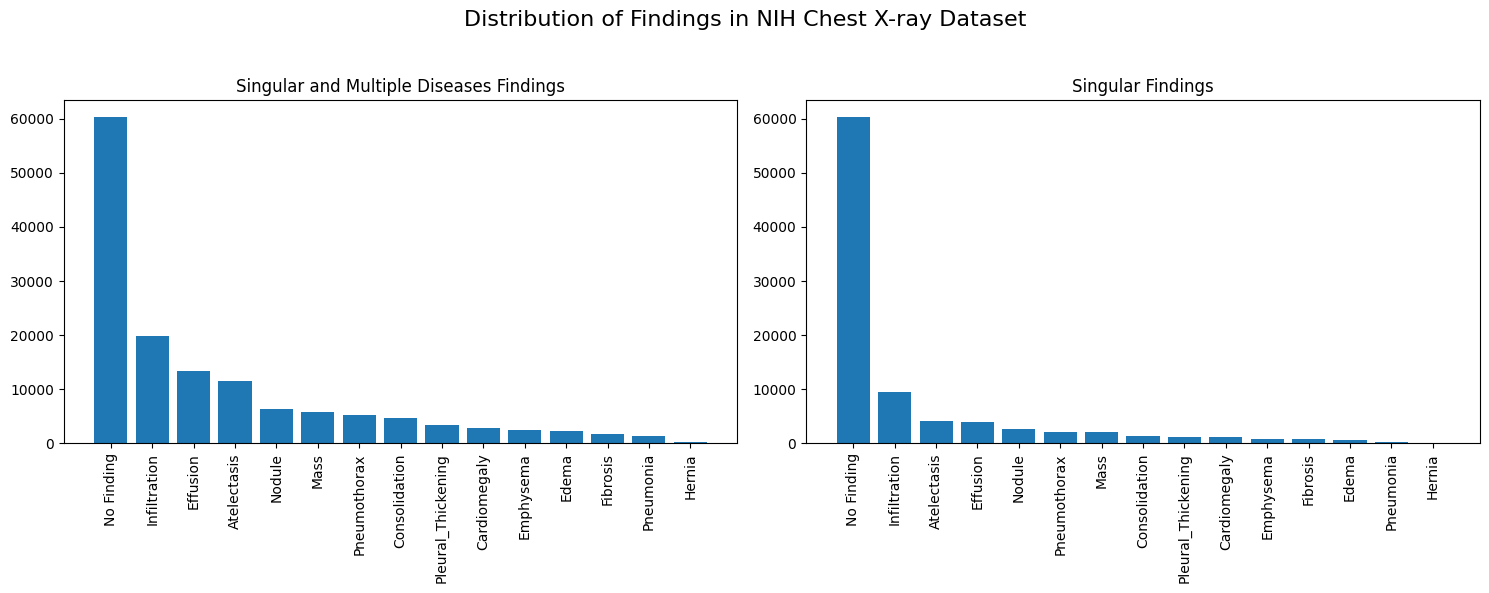

In [76]:
# All Diseases Sorted Dictionary
multiple_list = data_entry_df['Finding Labels'].str.split('|')
flattened_list = [item for sublist in multiple_list for item in sublist]
label_count = dict(Counter(flattened_list).most_common())

# Singular Diseases Sorted Dictionary
findings_dict = {key: value for key, value in data_entry_df['Finding Labels'].value_counts().items() if '|' not in key}

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribution of Findings in NIH Chest X-ray Dataset', fontsize=16)

# Plotting the multiple diseases barplot
ax[0].bar(label_count.keys(), label_count.values())
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel('')
ax[0].set_title('Singular and Multiple Diseases Findings')

# Plotting the singular diseases barplot
ax[1].bar(list(findings_dict.keys()), list(findings_dict.values()))
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_ylabel('')
ax[1].set_title('Singular Findings')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [77]:
groupby_df = data_entry_df[['Follow-up #', 'Finding Labels', 'Patient Age', 'Patient Age', 'Patient Gender']].copy(deep=True)
groupby_df['Patient Gender'] = np.where(groupby_df['Patient Gender']=='M', 0, 1)
groupby_df.groupby('Finding Labels').mean()

,Follow-up #,Patient Age,Patient Age,Patient Gender
Finding Labels,,,,
Atelectasis,7.486358,50.605931,50.605931,0.382444
Atelectasis|Cardiomegaly,6.772727,50.806818,50.806818,0.443182
Atelectasis|Cardiomegaly|Consolidation,4.100000,42.000000,42.000000,0.700000
Atelectasis|Cardiomegaly|Consolidation|Edema,6.000000,51.000000,51.000000,1.000000
Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Infiltration,6.000000,57.500000,57.500000,1.000000
...,...,...,...,...
Pneumothorax,14.175934,45.536919,45.536919,0.543756
Pneumothorax|Atelectasis,16.000000,54.000000,54.000000,0.000000
Pneumothorax|Infiltration,38.500000,59.500000,59.500000,0.000000


### Age Distribution Analysis

**Key Observations:**
1. **Distribution Shape**: The age distribution shows a right-skewed normal distribution
2. **Peak Age Range**: The highest frequency occurs around 55-60 years
3. **Age Span**: 
   - Minimum age: approximately 0 years (pediatric cases)
   - Maximum age: approximately 90 years
   - Most patients fall between 20-80 years

**Distribution Characteristics:**
- **Mode**: Peak frequency of about 10,000 patients in the 55-60 age group
- **Coverage**: Wide age range indicating diverse patient population
- **Density**: Higher density in middle-age groups (40-70 years)
- **Tails**: 
  - Gradual increase from young age (0-20)
  - Steady decline after age 60
  - Long right tail extending to 90+ years

This distribution suggests that the dataset predominantly represents middle-aged and older patients, which is typical for chest X-ray studies as respiratory conditions are more common in these age groups.

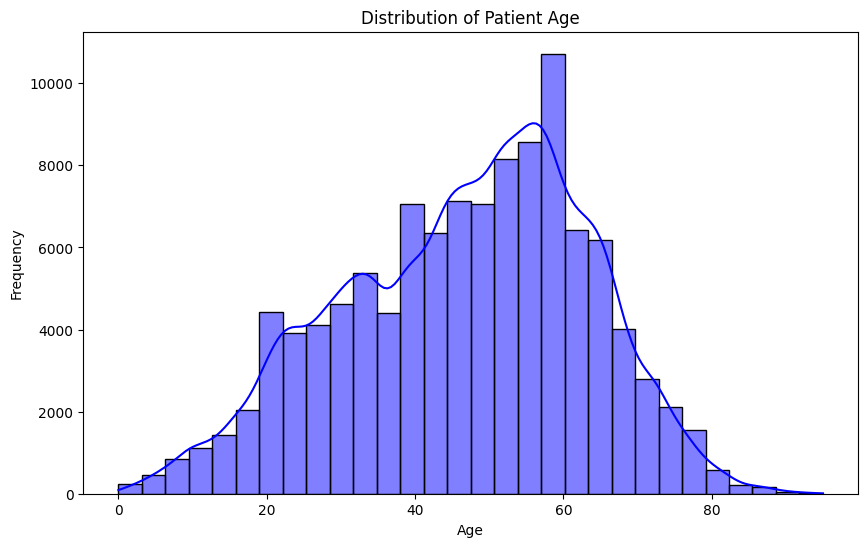

In [78]:
# Distribution of Patient Age
plt.figure(figsize=(10, 6))
sns.histplot(data_entry_df['Patient Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

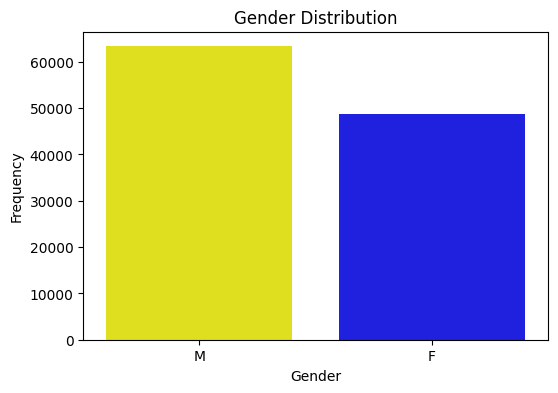

In [79]:
# Gender distribution
gender_counts = data_entry_df['Patient Gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=["yellow", "blue"], hue=gender_counts.index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

### Age Distribution Analysis by Gender

**Key Findings:**
1. The age distribution shows similar patterns for both males and females
2. Peak age range is around 55-60 years for both genders
3. Female patients show slightly higher numbers in the 60-70 age range

**Distribution Patterns:**
- Males (Blue):
  - Highest concentration between 50-65 years
  - Gradual increase from age 20-50
  - Sharp decline after age 70

- Females (Yellow):
  - Higher representation in older age groups (60-75)
  - Similar gradual increase from young age
  - More gradual decline in elderly population

**Clinical Implications:**
- Both genders show similar age-related disease patterns
- Middle-aged patients (40-70) form the core dataset
- Relatively balanced gender representation across age groups
- Under-representation of young patients (<20 years) for both genders

The overlapping distributions suggest that the dataset is well-balanced for gender-based analysis of lung conditions across different age groups.

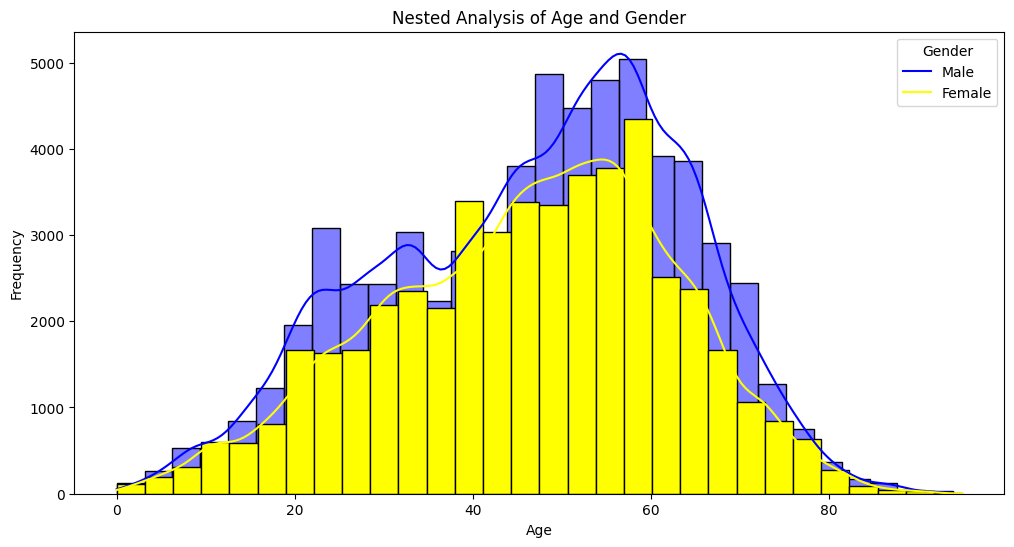

In [80]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=data_entry_df[data_entry_df['Patient Gender'] == 'M'],
    x='Patient Age',
    bins=30,
    kde=True,
    color="blue",
    alpha=0.5
)

sns.histplot(
    data=data_entry_df[data_entry_df['Patient Gender'] == 'F'],
    x='Patient Age',
    bins=30,
    kde=True,
    color="yellow",
    alpha=1
)

plt.title('Nested Analysis of Age and Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


### Cancer Position

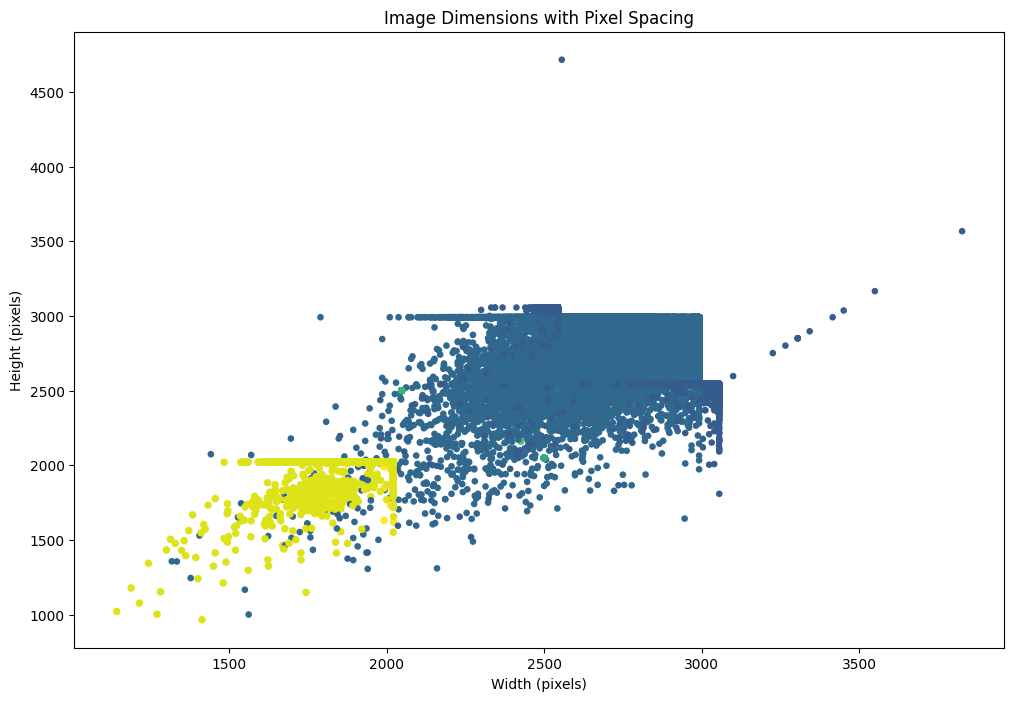

In [81]:
scatter_df = data_entry_df.copy()
plt.figure(figsize=(12, 8))
plt.scatter(
    scatter_df['Width'], 
    scatter_df['Height'],
    c=scatter_df['Spacing_X'],  # Color based on X spacing
    s=scatter_df['Spacing_Y']*100,  # Size based on Y spacing
    alpha=1,
)

plt.title('Image Dimensions with Pixel Spacing')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.show()